In [1]:
pip install yfinance pandas numpy scikit-learn matplotlib


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     - ----------------------------------- 41.0/949.2 kB 991.0 kB/s eta 0:00:01
     - ----------------------------------- 41.0/949.2 kB 991.0 kB/s eta 0:00:01
     --- --------------------------------- 92.2/949.2 kB 655.4 kB/s eta 0:00:02
     ---- ------------------------------- 122.9/949.2 kB 722.1 kB/s eta 0:00:02
     ----- ------------------------------ 153.6/949.2 kB 833.5 kB/s eta 0:00:01
     --------- -------------------------- 256.0/949.2 kB 983.0 kB/s eta 0:00:01
     ---------- ------------------------- 276.5/949.2 kB 947.5 kB/s eta 0:00:01
     --------------- ----------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\jomana farag soliman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed

Rows downloaded: 1253


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-08-24,122.423828,125.271465,120.556212,125.186343,345937600
2020-08-25,121.419518,121.764836,119.695376,121.295501,211495600
2020-08-26,123.070702,123.527880,121.669985,122.737547,163022400
2020-08-27,121.599442,124.006916,120.454061,123.673762,155552400
2020-08-28,121.402473,122.992862,121.178745,122.574593,187630000


Train size: 1000 | Test size: 250

=== Test Metrics ===
MAE:  2.7674
RMSE: 4.1892
R2:   0.9311


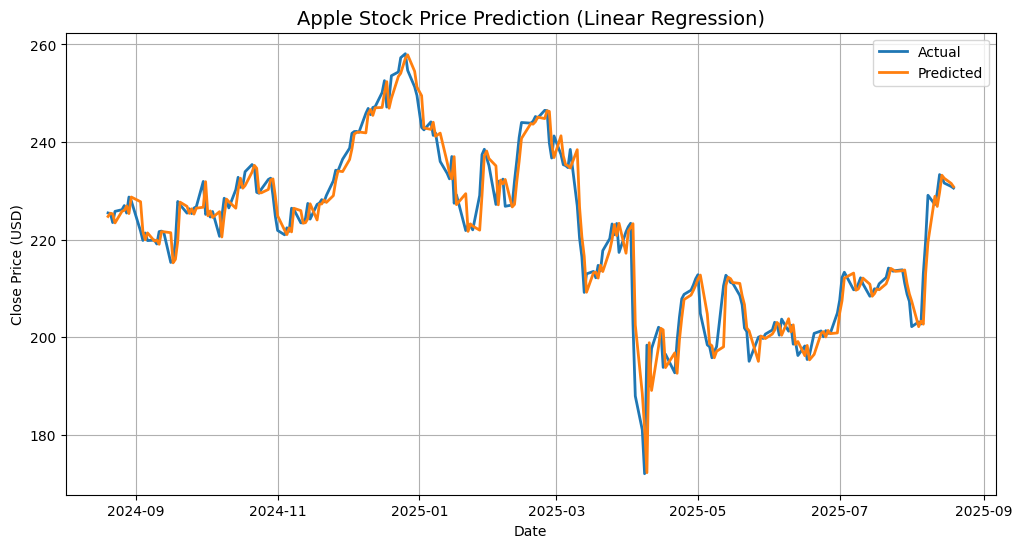

In [ ]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. Download Stock Data (AAPL)
# -------------------------------
print("Downloading AAPL stock data...")
data = yf.download("AAPL", start="2020-08-24", end="2025-08-20")

print(f"Rows downloaded: {len(data)}")
display(data.head())

# -------------------------------
# 2. Feature Engineering
# -------------------------------
# Use lag features: previous closing prices
data["Prev_Close_1"] = data["Close"].shift(1)
data["Prev_Close_2"] = data["Close"].shift(2)
data["Prev_Close_3"] = data["Close"].shift(3)

# Target variable: today's Close price
data = data.dropna()

X = data[["Prev_Close_1", "Prev_Close_2", "Prev_Close_3"]]
y = data["Close"]

# -------------------------------
# 3. Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Train size: {len(X_train)} | Test size: {len(X_test)}")

# -------------------------------
# 4. Build Model (Pipeline)
# -------------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe.fit(X_train, y_train)

# -------------------------------
# 5. Evaluation
# -------------------------------
y_pred = pipe.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # avoid 'squared' error
r2   = r2_score(y_test, y_pred)

print("\n=== Test Metrics ===")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2:   {r2:.4f}")

# -------------------------------
# 6. Visualization
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual", linewidth=2)
plt.plot(y_test.index, y_pred, label="Predicted", linewidth=2)
plt.title("Apple Stock Price Prediction (Linear Regression)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
